In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
from skimage.io import imsave, imread,imshow

from noise import add_salt_and_pepper, add_gauss_noise

%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 8]


Image shape (640, 640, 3)


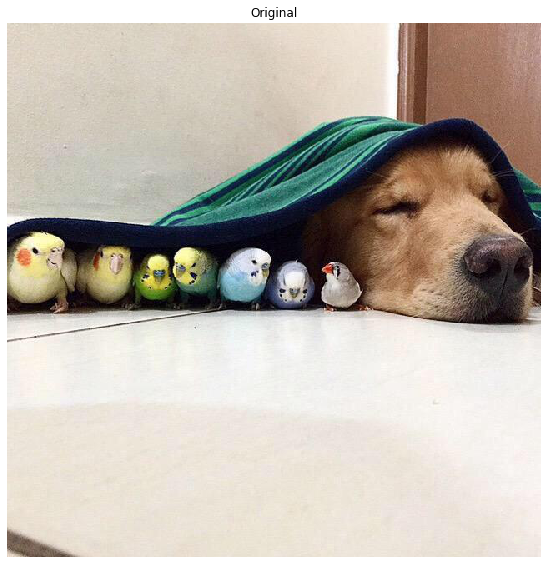

In [2]:
img = imread('image.jpg')
print("Image shape",img.shape)

imshow(img)
plt.axis('off'), plt.title('Original')  # Turn of axis numbers and ticks
plt.show()


# Practical session

### Task 1

Implement filtering operation in numpy (via loop). <br>
It will give you better understanding of what is going on, and also will develop your python coding skills.

Sample kernel is given. <br>
Functions which you may find useful: numpy.pad(), numpy.zeros_like(), numpy.multiply(), ...

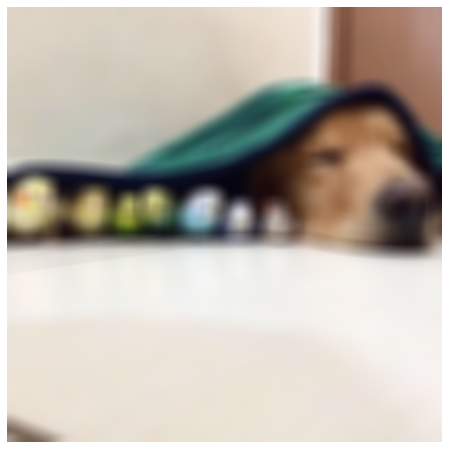

In [4]:
avgKernel = np.ones((25,25)) / 25**2
#print(avgKernel)

def filtering_2D(img, kernel):
    
    size = kernel.shape[0]
    print(size)
    pad = size//2
    print(pad)
    imgTemp = np.pad(img, ((pad,pad),(pad,pad)), 'symmetric') 
    res = np.zeros_like(img)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            patch = imgTemp[i:i+size,j:j+size]
            res[i][j] = np.sum(np.multiply(patch, kernel))
                
    return res

def filtering(img, kernel):
    
    res = np.zeros_like(img)
    for k in range(img.shape[2]):
        res[:,:,k] = filtering_2D(img[:,:,k], kernel)
                
    return res
    
imgFiltered = filtering(img, avgKernel)
plt.imshow(imgFiltered), plt.axis('off')
plt.show()

### Task 2

Implement different kernels:<br>

- Average 5x5, 15x15, 25x25
- (optional) Gaussian 5x5, 15x15, 25x25 <br>
( http://dev.theomader.com/gaussian-kernel-calculator/ )


### Task 3

Try to modify fuction `filtering()` to perform `median_filtering()`

In [7]:
def median_filtering(img, size):
    
    pad = size//2
    imgTemp = np.pad(img, ((pad,pad),(pad,pad),(0,0)), 'symmetric')
    res = np.zeros_like(img)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(img.shape[2]):
                patch = imgTemp[i:i+size,j:j+size,k]
                res[i][j][k] = np.median(patch)
                
    return res

### Task 4

Implement two types of noise: salt&papper and gaussian noise. Add it to the image and then filter results with filters created on previous step.<br>

Salt&pepper is given. <br>
Code for gaussian noise may look like `{ noisy = img + sigma * randn(img.shape) }`

Useful functions: numpy.random.randn(), ndarray.astype()<br>
_*keep in mind that output image should have type uint8 and be in range 0~255_

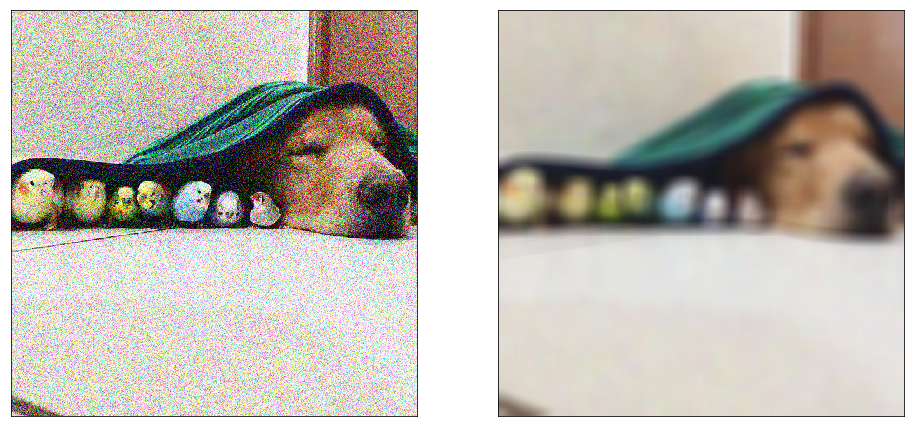

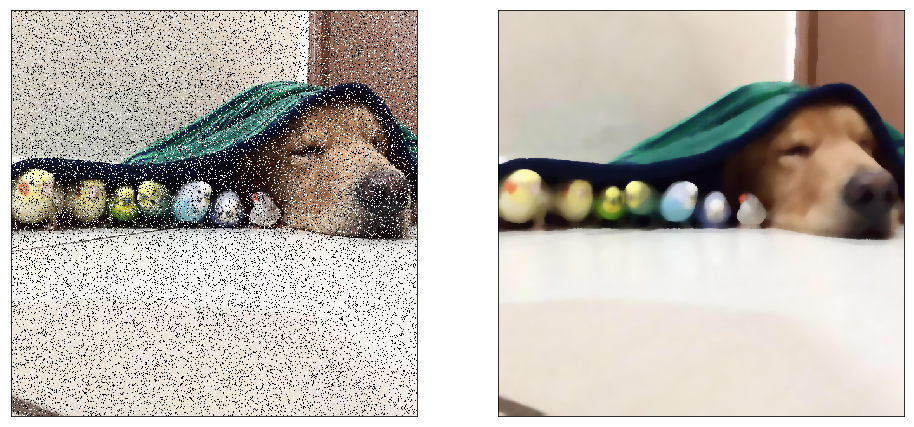

In [8]:
def add_salt_and_pepper(img, prob):

    rnd = np.random.rand(img.shape[0], img.shape[1])
    noisy = img.copy()
    noisy[rnd < prob] = 0
    noisy[rnd > 1 - prob] = 255
    return noisy


def add_gauss_noise(img, sigma):
    noisy = np.add(img, sigma * np.random.randn(img.shape[0],img.shape[1],img.shape[2]))
    noisy[noisy>255] = 255
    noisy[noisy<0] = 0
    noisy = noisy.astype(np.uint8)
    return noisy

noisyImg = add_gauss_noise(img, 50)
filteredNoisyImg = filtering(noisyImg, avgKernel)

plt.subplot(121),plt.imshow(noisyImg), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(filteredNoisyImg), plt.xticks([]), plt.yticks([])
plt.show()

noisyImg2 = add_salt_and_pepper(img,0.1)
filteredNoisyImg2 = median_filtering(noisyImg2, 15)

plt.subplot(121),plt.imshow(noisyImg2), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(filteredNoisyImg2), plt.xticks([]), plt.yticks([])
plt.show()

### Task 5

- Define Sobel operator in 4 directions (left, right, top, down). <br>
- apply them to the `img` using `filtering()`; you will obtain 4 arrays <br>
(presumably you will need to modify your filtering function to make it work with 2D arrays)
- find array of maxima of these four arrays
- find array of magnitude of these four arrays (square root from the sum of squared values)
- visualize the results

Useful functions: numpy.rot90, numpy.stack, plt.imshow(image, cmap='gray')

_*be careful with datatypes_

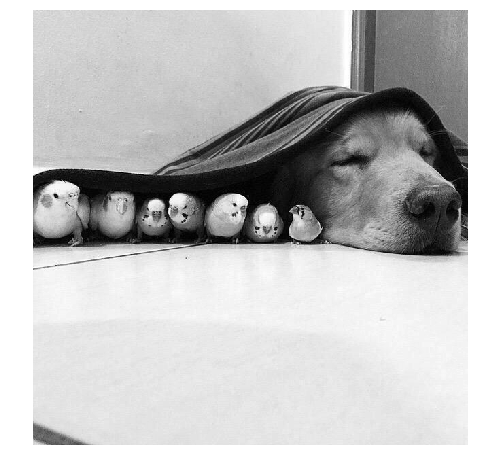

[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]] 

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]] 

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]] 

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]] 



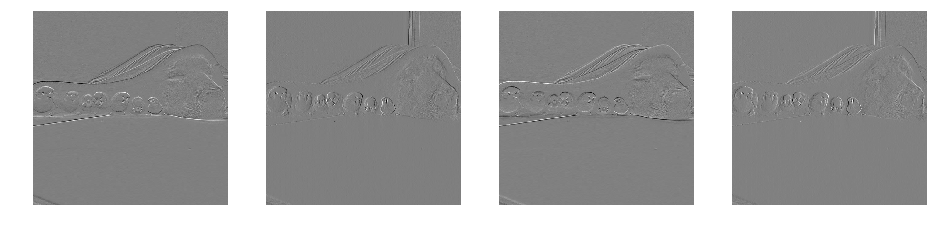

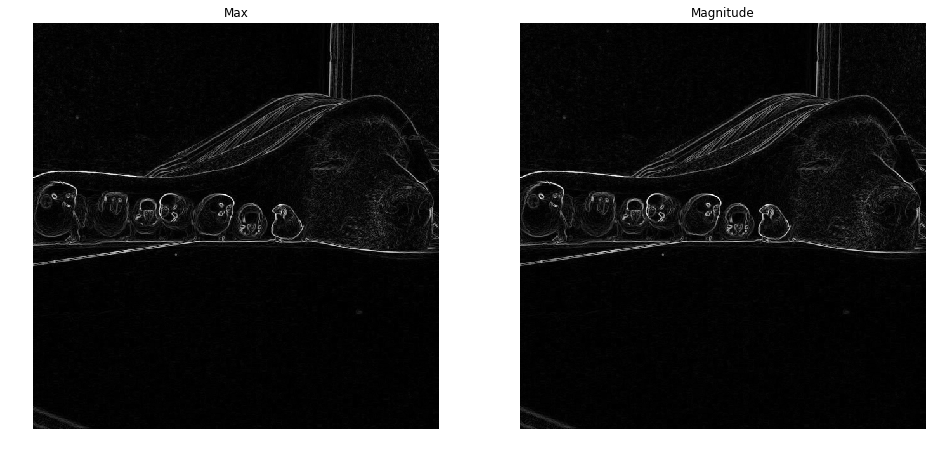

In [9]:
imgGray = 0.2989 * img[:,:,0] + 0.5870 * img[:,:,1] + 0.1140 * img[:,:,2]
plt.imshow(imgGray, cmap='gray'), plt.axis('off')
plt.show()

p1 = np.array([ [-1,-2,-1], [0,0,0], [1,2,1] ])
print(p1, "\n")

p2 = np.rot90(p1)
print(p2, "\n")

p3 = np.rot90(p2)
print(p3, "\n")

p4 = np.rot90(p3)
print(p4, "\n")

p = np.stack((p1, p2, p3, p4), axis= 2)
allDirections = np.stack([filtering_2D(imgGray, p[:,:,i_]) for i_ in range(4)], axis = 2)

for i_ in range(4):
    plt.subplot(1,4,i_+1), plt.imshow(allDirections[:,:,i_], cmap='gray'), plt.axis('off') 
plt.show()

imgMax = allDirections.max(2)
imgMagnitude = np.sqrt(np.sum(allDirections**2, axis = 2))

plt.subplot(121), plt.imshow(imgMax, cmap='gray'), plt.title('Max'), plt.axis('off')
plt.subplot(122), plt.imshow(imgMagnitude, cmap='gray'), plt.title('Magnitude'), plt.axis('off')
plt.show()